# Introdução


## Modelo de Ising

<div class="alert alert-dark">
<b>Entendendo modelo de Ising</b>
    
    - Oferece uma descrição de momento magnetico nuclear (spins) de dois estados +1 ou -1.
    
    - Queremos utilizar o modelo de Ising para estudar as transições de fase e simulações de monte carlo.
    
</div>

Pensando no spin como o momento magnético do sistema é esperado que situações em que os spins estejam todos alinhados correspondam ao máximo e minímo de magnetização.

**(ADICIONAR AQUI DISCUSSÃO SOBRE DISTRIBUIÇÃO DE BOLTZMANN E AS ESCALAS J E $K_B T$ "COMPETIREM")**

Nesse projeto estamos estudando o modelo de Ising como um grafo plano $2$-d mas poderiamos adotar outras geometrias.

Podemos definir os possíveis estados de cada sítio como $\sigma_k = \{-1, +1\}$. Trabalhamos simplesmente com uma malha $2$-d em que cada sítio pode estar em um dos estados $\sigma_k$. 

Nesse modelo trabalhamos apenas com iterações entre os vizinhos mais próximos de cada sítio, ou seja, os que estão adjacentes à esquerda, cima, direita e abaixo.  

O hamiltoniano que descreve a energia desse sistema é então:

$$
    \hat{H} = -\frac{J}{2} \sum_{i = 1}^{L} \sum_{j = 1}^{L} s(i ,j)  \left[ S_1 + S_2 + S_3 + S_4\right] 
    \Longrightarrow
    \begin{cases}
    S_1 = s(i-1, j) \\ S_2 = s(i+1, j)\\ S_3 = s(i, j-1) \\ S_4 = s(i, j+1)
    \end{cases}
$$

Por simplicidade adotamos apenas malhas quadradas então o tamanho em $x$ e $y$ é o mesmo: $L$.



A magnetização é uma grandeza relacionada à _desordem__ do sistema de spins e é dada por 
$$ m = \frac{M}{N} = \frac{1}{N} \sum_{i = 1}^{N} \sum_{j = 1}^{N} s(i, j)$$

Dessa forma, se $T = 0$ as únicas possíbilidades de valor para $m$ são $-1$ ou $1$ (ou seja, basta olhar para um sítio para saber a configuração de toda malha). Para $T \to \infty$ as configurações podem ser mais complicadas. 


Então para uma dada temperatura $T$ a _magnetização_ média é 

$$ 
    \langle m \rangle = \langle \frac{M}{N} \rangle = \frac{1}{N} \bigg\langle \sum_{i, j}^{N} s(i, j) \bigg\rangle
$$

A probabilidade dos spins estarem em uma configuração de energia $E$ é proporcional à $e^{\beta E}$ (fator de Boltzmann). Como $\beta = \frac{1}{K_B T}$ temos que, para $J \gg K_B T$ a temperatura é baixa, a energia é alta e a probabilidade será de que poucos spins estariam opostos aos outros. Já se $K_B T \gg J$ a temperatura é alta e haverá maior desordem no sistema.

Para cada configuração $\{s(i, j)\}$ existe uma energia associada pela $\hat{H}$ e uma probabilidade dessa energia ocorrer dada por $P(E) \propto e^{\beta E}$.


Motivação para usar simulação de Monte Carlo: No cálculo $\langle m(T) \rangle$ temos que percorrer todo um espaço de estados possíveis de tamanho $2^{N^2}$. 

## Entendendo simulação de Monte Carlo

-   Definimos temperatura final desejada $T$ onde $\beta = \frac{1}{K_B T}$.
-   Escolhemos um número de passos total para dinâmica de Monte Carlo.
-   Inicializa todos spins da malha.
-   Performa dinâmica de Monte Carlo pela malha:


    -   Percorre todas as linhas e colunas da malha ou percorre sítios individuais
        aleatoriamente.
    -   Para cada sítio calcula a probabilidade flipar o spin do sítio, ou seja, 
    $P(s)$ ou $P(-s)$ onde 
        $$ P(s) = \frac{e^{\beta s M}}{e^{-\beta s M} + e^{\beta s M}}; P(-s) = \frac{e^{-\beta s M}}{e^{\beta s M} + e^{-\beta s M}}$$
        com $M = J \left[s(i-1, j)+s(i+1,j)+s(i,j-1)+s(i,j+1)\right]$

    - Se o spin mudar, atualizar o valor da magnetização atual $m$ e a energia total $E$, que são nossas
    quantidades de interesse.

-   Quando o sistema atinge equilíbrio, após $N_m$ iterações de Monte Carlo, começamos a tirar médias das quantidades. Para determinar se atingiu um ponto de equilíbrio podemos definir uma variação mínima aceitável entre alguma das grandezas como magnetização ou energia.
    

    

## ANTIGO

Energia em cada sítio depende apenas dos vizinhos e pode ser calculada inicialmente por
$$E_i = E_0  + J \cdot s(i, j) \cdot (S_1 + S_2+ S_3 + S_4)$$

A energia após uma interação de Monte Carlo é 

$$ E_f = E_0 - J\cdot s(i,j) \cdot (S_1 + S_2 + S_3 + S_4) $$

onde $E_0$ é o termo da energia que não depende do spin $s(i, j)$.

Sabemos que $P(E_i) + P(E_f) = 1$, então 

$$ P(E_i) = \frac{e^{-\beta E_i}}{e^{-\beta E_i} + e^{-\beta E_f}} \\ P(E_f) = \frac{e^{-\beta E_f}}{e^{-\beta E_f} + e^{-\beta E_f} }$$

Passando a trabalhar com probabilidade de spin ao invés de energia, definimos, assim como antes:


Probabilidade $P(s)$ de um spin $s(i, j)$ permaneça com o mesmo valor é 

$$
P(s) = \frac{e^{\beta s \hat{H}_m}}{e^{\beta s \hat{H}_m} + e^{-\beta s \hat{H}_m}}$$

Probabilidade que um spin mude é $P(-s)$ :

$$
P(-s) = \frac{e^{-\beta s \hat{H}_m}}{e^{-\beta s \hat{H}_m}  + e^{\beta s \hat{H}_m}}$$ 

# Discussão e resultados

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DPi = 300

In [63]:
def plot_configuration(path1, path2):
    
    data1 = np.loadtxt(path1)
    data2 = np.loadtxt(path2)




    fig, ax = plt.subplots(1, 2, figsize=(12, 5), facecolor='lightgray')
    plt.style.use('default')

    font = {
            'weight' : 'bold',
            'size'   : 16}
    plt.rc('text', usetex=True)
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
    plt.rc('font', **font) 

#     ax[0].set_xlim(0, len(data1[:, 0]))
#     ax[1].set_xlim(0, len(data2[:, 0]))

    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[0].imshow(data1, cmap='coolwarm', interpolation='nearest')
    ax[1].imshow(data2, cmap='coolwarm', interpolation='nearest')
    # plt.colorbar()
    return fig

## Tarefa A - Dinâmica de Monte Carlo

In [ ]:
fig = plot_configuration("./saidas/tarefa-1/saida-L60-b3.dat", "saidas/tarefa-1/saida-L60-b01.dat")
plt.savefig("graficos/tarefa-1/graf-configuracao-L60.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

In [ ]:
fig = plot_configuration("./saidas/tarefa-1/saida-L100-b3.dat", "saidas/tarefa-1/saida-L100-b01.dat")
plt.savefig("graficos/tarefa-1/graf-configuracao-L100.png", dpi = DPi, bbox_inches = 'tight')

plt.show()

## Tarefa B - Recozimento e Têmpera

### Tarefa B1


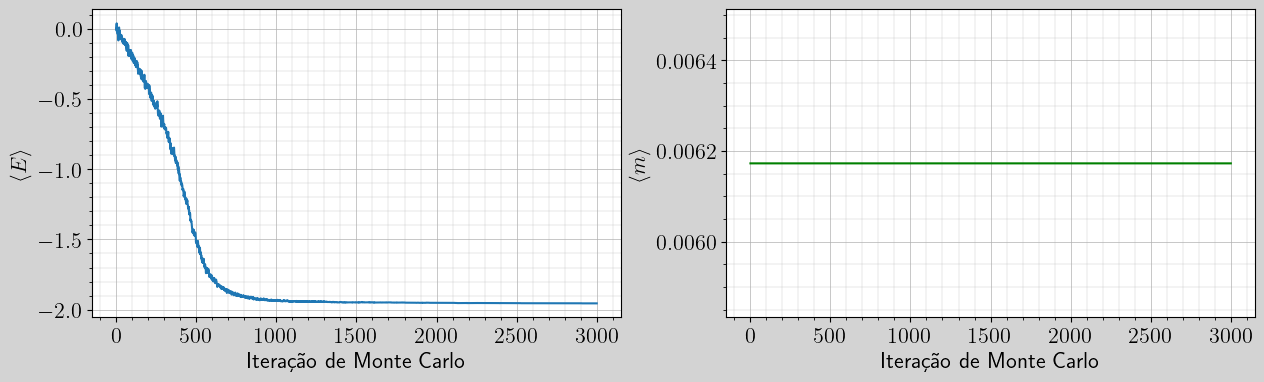

In [96]:
data = np.loadtxt("saidas/tarefa-2/b1/saida-magnetizacao-energia-b1.dat")

steps = data[:, 0]
mag = data[:, 1]
E = data[:, 2]

fig, ax = plt.subplots(1, 2, figsize=(15, 4), facecolor='lightgray')

ax[0].set_xlabel('Iteração de Monte Carlo')
ax[0].set_ylabel('$\\langle E \\rangle$')
ax[0].plot(steps, E)

ax[1].set_xlabel('Iteração de Monte Carlo')
ax[1].set_ylabel('$\\langle m \\rangle$')
ax[1].plot(steps, mag, color="green")


ax[0].grid(which = "major", linewidth = 0.5)
ax[0].grid(which = "minor", linewidth = 0.2)
ax[0].minorticks_on()


ax[1].grid(which = "major", linewidth = 0.5)
ax[1].grid(which = "minor", linewidth = 0.2)
ax[1].minorticks_on()

plt.show()

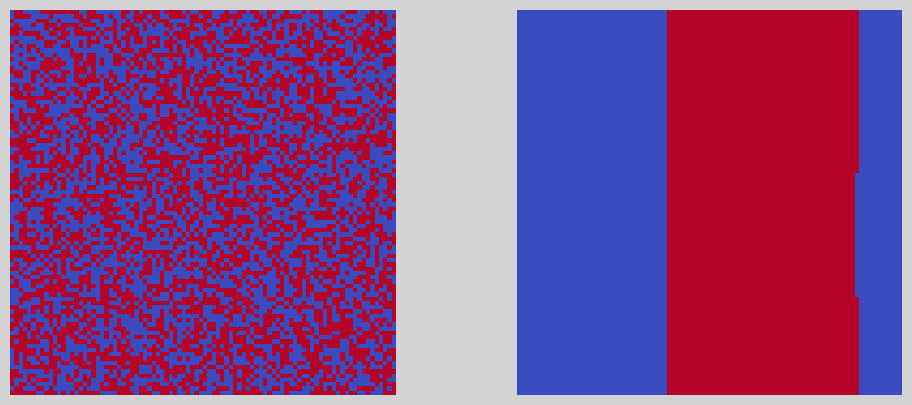

In [98]:
fig = plot_configuration("saidas/tarefa-2/b1/saida-configuracao-inicial-b1.dat", "saidas/tarefa-2/b1/saida-configuracao-final-b1.dat")
# plt.savefig("graficos/tarefa-1/graf-configuracao-L60.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

### Tarefa B2

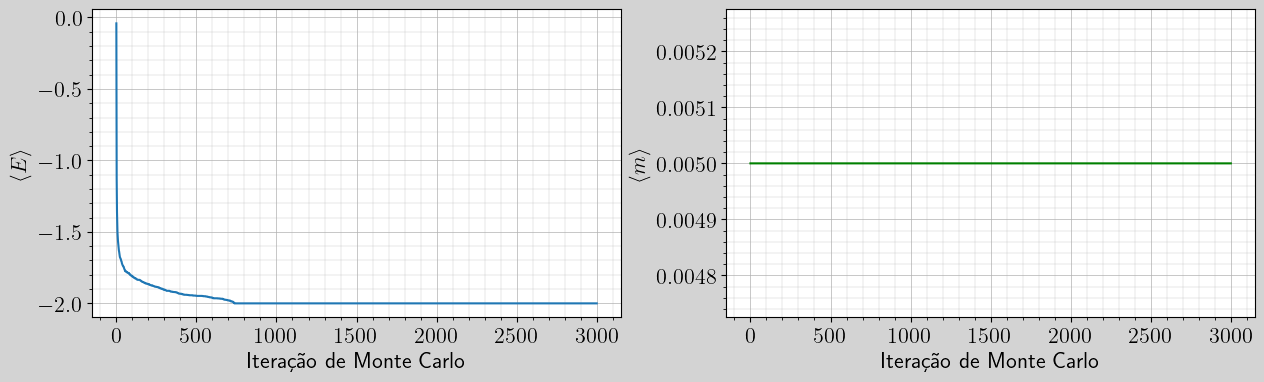

In [102]:
data = np.loadtxt("saidas/tarefa-2/b2/saida-magnetizacao-energia-b2.dat")

steps = data[:, 0]
mag = data[:, 1]
E = data[:, 2]

fig, ax = plt.subplots(1, 2, figsize=(15, 4), facecolor='lightgray')

ax[0].set_xlabel('Iteração de Monte Carlo')
ax[0].set_ylabel('$\\langle E \\rangle$')
ax[0].plot(steps, E)

ax[1].set_xlabel('Iteração de Monte Carlo')
ax[1].set_ylabel('$\\langle m \\rangle$')
ax[1].plot(steps, mag, color="green")


ax[0].grid(which = "major", linewidth = 0.5)
ax[0].grid(which = "minor", linewidth = 0.2)
ax[0].minorticks_on()


ax[1].grid(which = "major", linewidth = 0.5)
ax[1].grid(which = "minor", linewidth = 0.2)
ax[1].minorticks_on()

plt.show()

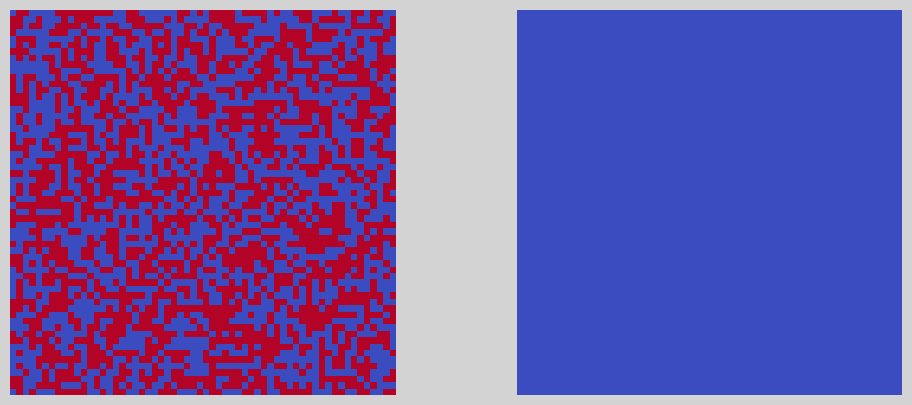

In [101]:
fig = plot_configuration("saidas/tarefa-2/b2/saida-configuracao-inicial-b2.dat", "saidas/tarefa-2/b2/saida-configuracao-final-b2.dat")
# plt.savefig("graficos/tarefa-1/graf-configuracao-L60.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

## Tarefa C - Loop térmico

## Tarefa D - Quebra espontânea de simetria